## Setup

In [11]:
import numpy as np
import pandas as pd
import plotnine as pn

from collections import Counter

from sciterra.mapping.atlas import Atlas

In [12]:
bibtex_fp = "data/single_publication.bib"
atlas_dir = "outputs/atlas_s2"

In [13]:
atl = Atlas.load(atlas_dir)

In [14]:
len(atl)

3252

## Exploratory data analysis

In [15]:
# can we get information by year?
years = dict()
papers_per_year = dict()
words = Counter()

def get_binary_occurences(abstract: str):
    """Return a Counter that counts up to 1 for each word."""
    counter = Counter(abstract.split())
    for k in counter:
        counter[k] = 1
    return counter

for id in atl.publications:
    pub = atl[id]
    # there should be functionality to pass to atlas to 'filter if None' that removes all publications / embeddings that have certain attributes None
    if pub.publication_date is not None:
        year = pub.publication_date.year
        if year not in years:
            years[year] = Counter()
            papers_per_year[year] = 0
        years[year] += get_binary_occurences(pub.abstract)
        papers_per_year[year] += 1


In [16]:
# sorted(papers_per_year)
papers_per_year

{1990: 19,
 2013: 94,
 1988: 15,
 1983: 15,
 2010: 121,
 1998: 46,
 2019: 145,
 2016: 116,
 1967: 3,
 1993: 35,
 1981: 13,
 1939: 1,
 2000: 51,
 1978: 11,
 1976: 8,
 1997: 48,
 2020: 179,
 2009: 88,
 1994: 28,
 1962: 2,
 1989: 15,
 2018: 127,
 2023: 30,
 2004: 71,
 1982: 7,
 1986: 14,
 1969: 5,
 1947: 3,
 1987: 14,
 2006: 82,
 2011: 105,
 2017: 136,
 1980: 12,
 2007: 82,
 2015: 134,
 1992: 22,
 1973: 8,
 1991: 17,
 2022: 83,
 1984: 17,
 1951: 1,
 1964: 2,
 1985: 11,
 1977: 9,
 1968: 5,
 1945: 1,
 2005: 71,
 2021: 115,
 1996: 38,
 1910: 1,
 1999: 28,
 2003: 52,
 1953: 2,
 1961: 4,
 1952: 1,
 1970: 4,
 1974: 4,
 2014: 102,
 1975: 5,
 1941: 1,
 1956: 3,
 1971: 5,
 2001: 50,
 1972: 6,
 2012: 91,
 1979: 4,
 2008: 93,
 1954: 2,
 2002: 50,
 1995: 39,
 1965: 1,
 1957: 3,
 1958: 2,
 1920: 1,
 1923: 1,
 1963: 1,
 1917: 1,
 1966: 2,
 1959: 1}

In [17]:
# divide the concept counts by the number of papers per year
for key in papers_per_year:
    counter = years[key]
    for word, freq in counter.items():
        counter[word] = freq / papers_per_year[key]

years

{1990: Counter({'of': 0.8947368421052632,
          'in': 0.8947368421052632,
          'the': 0.8947368421052632,
          'is': 0.8421052631578947,
          'to': 0.8421052631578947,
          'and': 0.8421052631578947,
          'for': 0.7894736842105263,
          'a': 0.7368421052631579,
          'The': 0.6842105263157895,
          'are': 0.631578947368421,
          'that': 0.5789473684210527,
          'on': 0.5789473684210527,
          'which': 0.5263157894736842,
          'with': 0.5263157894736842,
          'by': 0.5263157894736842,
          'from': 0.47368421052631576,
          'A': 0.47368421052631576,
          'can': 0.47368421052631576,
          'at': 0.42105263157894735,
          'or': 0.42105263157894735,
          'be': 0.42105263157894735,
          'model': 0.3684210526315789,
          'flow': 0.3684210526315789,
          'used': 0.3684210526315789,
          'an': 0.3684210526315789,
          'normal': 0.3157894736842105,
          'It': 0.31578947368

In [18]:
# now just remove years that don't have more than N papers?
years = {k:v for k,v in years.items() if papers_per_year[k] > 30}

sorted(years.keys())

[1993,
 1995,
 1996,
 1997,
 1998,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

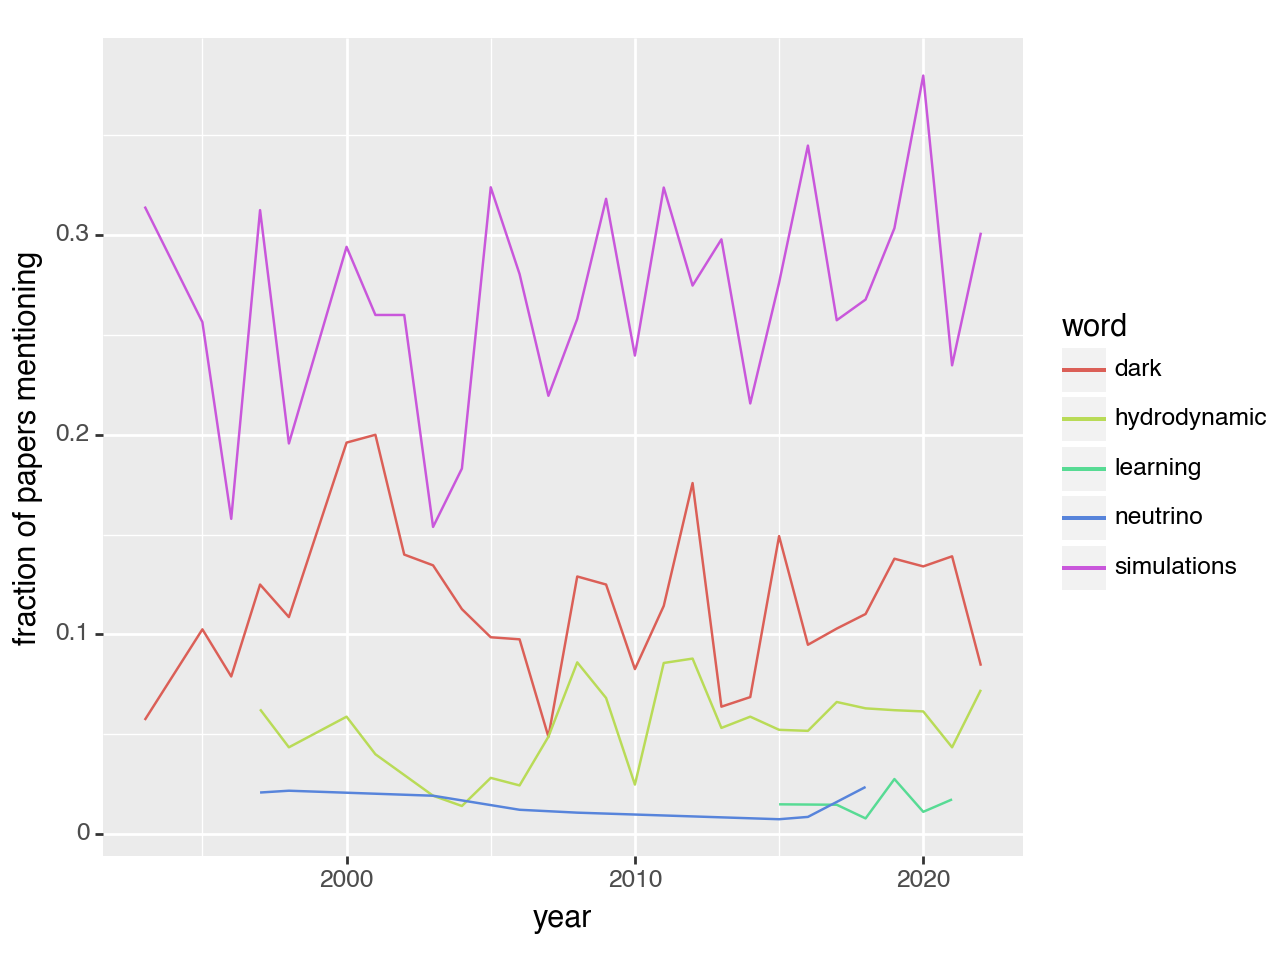

<Figure Size: (640 x 480)>

In [22]:
# write a function that can visualize the changing distribution over referents

dfs = []
for year, counter in sorted(years.items()):
    dfs.append(
        pd.DataFrame(
        [(k,v,year) for k,v in counter.items()],
        columns=["word", "fraction of papers mentioning", "year"]
        )
    )

data = pd.concat(dfs)

# lets just look at a few words for now
words = [
    "learning",
    "hydrodynamic",
    "simulations",
    "neutrino",
    "exoplanet",
    "dark",
]

data = data[data["word"].isin(words)]
data

(
    pn.ggplot(data, pn.aes(x="year", y="fraction of papers mentioning"))
    # + pn.geom_point(
    + pn.geom_line(
        mapping=pn.aes(
            color="word",
        )
    )
)